In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import json
import sys
sys.path.append("../../")

import anamic

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile
from scipy import ndimage

data_dir = Path('/home/hadim/.data/Fake Microtubules/anamic')

/home/hadim/local/conda/envs/ws/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
../../anamic/transformations.py:1916: UserWarning: No module named 'anamic._transformations'
  warnings.warn(str(err))


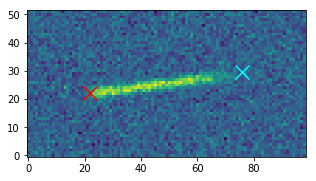

In [2]:
condition = "taper_length_nm_2000"
fnames = list((data_dir / condition).glob("*.tif"))

index = 2
fname = fnames[index]

# Open the image
im = tifffile.imread(str(fname))

# Load metadata
metadata = json.load(open(fname.with_suffix('.json')))

# Get microtubule tip coordinates
tip_start = np.array(metadata['tip_start'])
tip_end = np.array(metadata['tip_end'])

# Check the tips locations.
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(im, interpolation='none', origin=[0, 0], cmap='viridis')
ax.set_aspect('equal')
ax.scatter(tip_start[1], tip_start[0], color='red', s=200, marker="x")
ax.scatter(tip_end[1], tip_end[0], color='cyan', s=200, marker="x")

In [4]:
# Line profile parameters
# See `help(anamic.fitter.line_profile)`
# for details about the arguments.

profile_parameters = {}
profile_parameters['length_spacing'] = 0.1  # pixel
profile_parameters['line_thickness'] = 400 / metadata['pixel_size'] # pixel
profile_parameters['width_spacing'] = 0.1  # pixel
profile_parameters['normalized_intensities'] = False

x_profile, y_profile = anamic.fitter.line_profile(im, tip_start, tip_end, **profile_parameters)

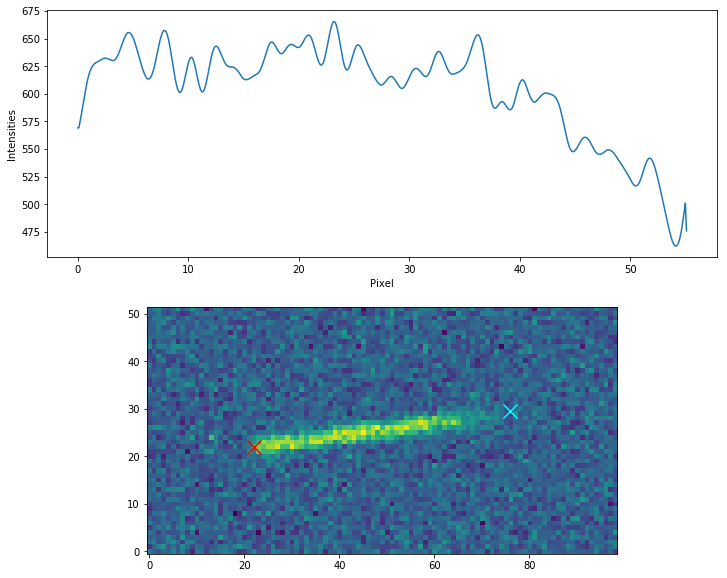

In [5]:
# Visualize the line profile
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 10))

ax1.plot(x_profile, y_profile)
ax1.set_xlabel("Pixel")
ax1.set_ylabel("Intensities")

ax2.imshow(im, interpolation='none', origin=[0, 0], cmap='viridis')
ax2.set_aspect('equal')
ax2.scatter(tip_start[1], tip_start[0], color='red', s=200, marker="x")
ax2.scatter(tip_end[1], tip_end[0], color='cyan', s=200, marker="x")